In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a5d6facc1fa9dec0bc6deb416e176d6f


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a5d6facc1fa9dec0bc6deb416e176d6f&q=Boston


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 44.64,
  'feels_like': 30.34,
  'temp_min': 42.8,
  'temp_max': 46.4,
  'pressure': 1010,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 19.46, 'deg': 290, 'gust': 28.86},
 'clouds': {'all': 75},
 'dt': 1606166909,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1606131932,
  'sunset': 1606166187},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 46.4 65 75 19.46


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | vaitape
Processing Record 6 of Set 1 | bom jesus
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | fort nelson
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | tashtagol
Processing Record 15 of Set 1 | cagliari
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | amderma
City not found. Skipp

Processing Record 32 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 33 of Set 4 | atar
Processing Record 34 of Set 4 | nouakchott
Processing Record 35 of Set 4 | cordoba
Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | ondangwa
Processing Record 38 of Set 4 | mendoza
Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | iwaki
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | chernogorsk
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | dale
Processing Record 46 of Set 4 | hervey bay
Processing Record 47 of Set 4 | arman
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | rabat
Processing Record 50 of Set 4 | queimadas
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | kupino
Processing Record 3 of Set 5 | verkhneyarkeyevo
Processing Record 4 of Set 5 | pacifica
Processing Record 5 of Set 5 | ixtapa
Pro

Processing Record 26 of Set 8 | alice springs
Processing Record 27 of Set 8 | mamallapuram
Processing Record 28 of Set 8 | praia da vitoria
Processing Record 29 of Set 8 | suriapet
Processing Record 30 of Set 8 | gat
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | carazinho
Processing Record 33 of Set 8 | vangaindrano
Processing Record 34 of Set 8 | xilopolis
Processing Record 35 of Set 8 | cockburn town
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | ust-nera
Processing Record 38 of Set 8 | catabola
Processing Record 39 of Set 8 | port blair
Processing Record 40 of Set 8 | danielskuil
Processing Record 41 of Set 8 | kichha
Processing Record 42 of Set 8 | manaus
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | conceicao do araguaia
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | axim
Processing Record 48 of Set 8 | cap malheureux
Processing Record 

Processing Record 16 of Set 12 | mount isa
Processing Record 17 of Set 12 | sukhumi
Processing Record 18 of Set 12 | chai badan
Processing Record 19 of Set 12 | linhares
Processing Record 20 of Set 12 | atyrau
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | dickinson
Processing Record 23 of Set 12 | talara
Processing Record 24 of Set 12 | moron
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | yenagoa
Processing Record 27 of Set 12 | husavik
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | el sauzal
Processing Record 30 of Set 12 | chapala
Processing Record 31 of Set 12 | houma
Processing Record 32 of Set 12 | kampot
Processing Record 33 of Set 12 | walvis bay
Processing Record 34 of Set 12 | bukama
Processing Record 35 of Set 12 | fryanovo
Processing Record 36 of Set 12 | kilosa
Processing Record 37 of Set 12 | baijiantan
Processing Record 38 of Set 12 | tessalit
Processing Record 39 of Set 12 | fare
-

In [13]:
len(city_data)

546

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,77.97,75,4,13.87,PF,2020-11-23 21:33:00
1,Cape Town,-33.93,18.42,61.00,87,75,13.87,ZA,2020-11-23 21:31:23
2,Vaini,-21.20,-175.20,78.80,78,75,8.05,TO,2020-11-23 21:33:02
3,Mar Del Plata,-38.00,-57.56,68.00,82,75,13.87,AR,2020-11-23 21:31:28
4,Vaitape,-16.52,-151.75,81.88,75,67,9.42,PF,2020-11-23 21:42:32
5,Bom Jesus,-9.07,-44.36,75.63,83,36,3.65,BR,2020-11-23 21:42:32
6,Flinders,-34.58,150.86,66.99,78,50,3.00,AU,2020-11-23 21:33:48
7,Rikitea,-23.12,-134.97,73.76,62,98,2.21,PF,2020-11-23 21:32:46
8,Kapaa,22.08,-159.32,80.60,69,75,18.34,US,2020-11-23 21:32:49
9,Margate,51.38,1.39,48.99,85,6,3.00,GB,2020-11-23 21:32:47


In [15]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-11-23 21:33:00,-9.80,-139.03,77.97,75,4,13.87
1,Cape Town,ZA,2020-11-23 21:31:23,-33.93,18.42,61.00,87,75,13.87
2,Vaini,TO,2020-11-23 21:33:02,-21.20,-175.20,78.80,78,75,8.05
3,Mar Del Plata,AR,2020-11-23 21:31:28,-38.00,-57.56,68.00,82,75,13.87
4,Vaitape,PF,2020-11-23 21:42:32,-16.52,-151.75,81.88,75,67,9.42
5,Bom Jesus,BR,2020-11-23 21:42:32,-9.07,-44.36,75.63,83,36,3.65
6,Flinders,AU,2020-11-23 21:33:48,-34.58,150.86,66.99,78,50,3.00
7,Rikitea,PF,2020-11-23 21:32:46,-23.12,-134.97,73.76,62,98,2.21
8,Kapaa,US,2020-11-23 21:32:49,22.08,-159.32,80.60,69,75,18.34
9,Margate,GB,2020-11-23 21:32:47,51.38,1.39,48.99,85,6,3.00


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

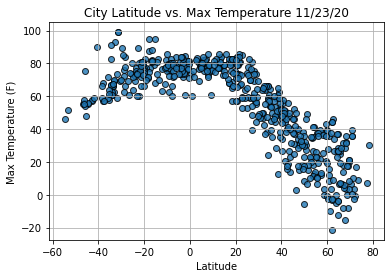

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

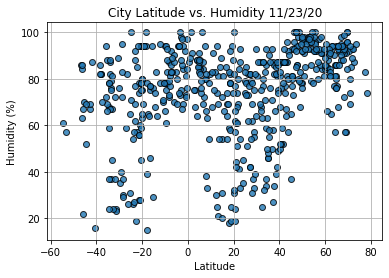

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

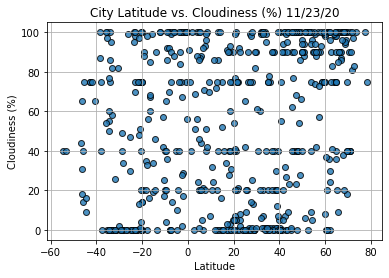

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

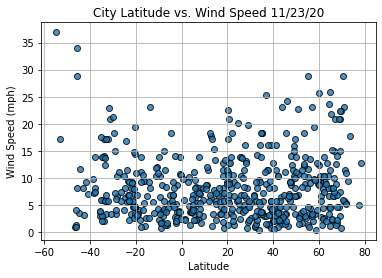

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
8,Kapaa,US,2020-11-23 21:32:49,22.08,-159.32,80.60,69,75,18.34
9,Margate,GB,2020-11-23 21:32:47,51.38,1.39,48.99,85,6,3.00
10,Albany,US,2020-11-23 21:29:46,42.60,-73.97,39.99,77,7,1.99
11,Fort Nelson,CA,2020-11-23 21:30:02,58.81,-122.70,-0.40,84,75,0.40
13,Tashtagol,RU,2020-11-23 21:42:33,52.77,87.89,22.21,96,100,1.59


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

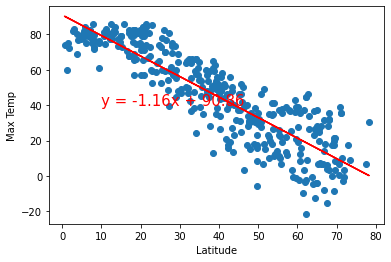

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

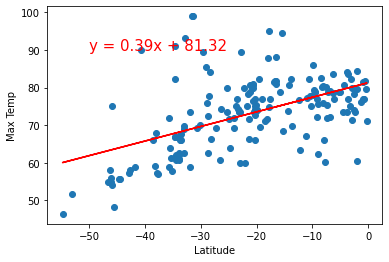

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

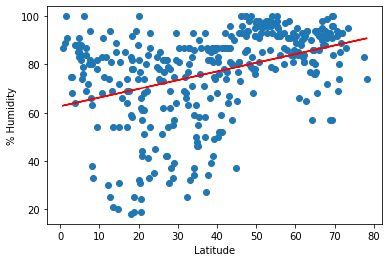

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

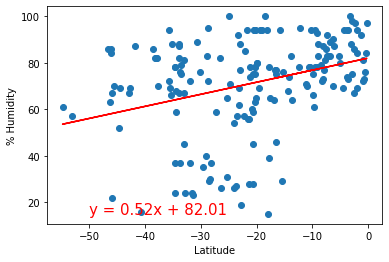

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

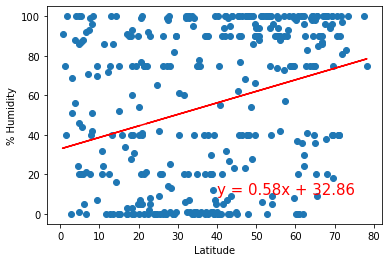

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(40,10))

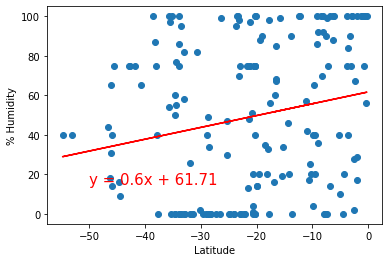

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Humidity',(-50,15))

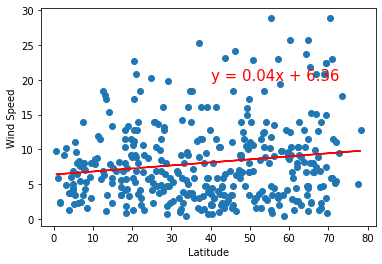

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))

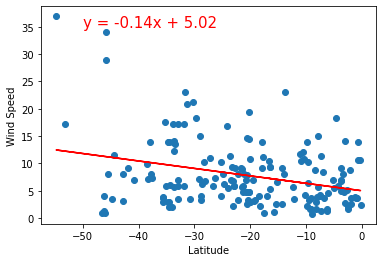

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [42]:
$ conda install -c conda-forge gmaps

SyntaxError: invalid syntax (<ipython-input-42-0d3fab778bf5>, line 1)